# Crime and Where It Happens: Atlanta

### The dataset I will be using , *Crime in Atlanta*, comes from Kaggle but the original raw data is sourced from the Atlanta Police Department's crime data reporting website (a useful resource that is updated weekly). This data represents each instance of a crime committed within the city. As a resident of the city of Atlanta, I found this data compelling to explore to see if it matched up with my experiences and observations, but also informative, because as the APD states on its website, this data is used by commanders to make decisions about the deployment of officers across the city. I also happen to be in the market for a house and would like to get a better sense of the dynamics in the various neighborhoods around town. So, let's take a look at the crimes, where they happen, and help inform my decision about where to purchase a home. 

In [90]:
# Import packages for reading and manipulating the above described dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# Read .csv file containing the data in as a pandas dataframe called 'df'
df = pd.read_csv('atlcrime.csv', low_memory=False)

In [92]:
# View the first 10 rows of data
df.head(10)

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long
0,0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
5,5,BURGLARY-RESIDENCE,103040333,10/31/2010,430 W WESLEY RD NW,205,Peachtree Battle Alliance,C,33.82838,-84.40133
6,6,ROBBERY-PEDESTRIAN,103040345,10/31/2010,MYRTLE DR @ PLAZA LN,410,Campbellton Road,R,33.70537,-84.45498
7,7,LARCENY-NON VEHICLE,103040385,10/31/2010,1980 DELOWE DR SW,410,Campbellton Road,R,33.70121,-84.45724
8,8,LARCENY-FROM VEHICLE,103040387,10/31/2010,506 MORELAND AVE SE,201,Brandon,C,33.83193,-84.42627
9,9,LARCENY-FROM VEHICLE,103040412,10/31/2010,229 PEACHTREE ST NE,509,Downtown,M,33.76040,-84.38746


### With our first look at the data, it contains info for the crime, number, date, location, beat, neighborhood, NPU (Neighborhood Planning Unit), latitude and longitude. The level of location detail here makes sense considering the main use for this data is how best to utilize the police officers across the city. However, I'm more curious as to what crimes are being committed and in which neighborhoods they are happening, specifically burglaries from residences.  To better understand that view, I'll drop some of the more specific location data, such as latitude and longitude and focus more on the neighborhoods where they are occurring while retaining the time data stored in the 'date' column.

In [93]:
# Drop columns that won't be used in this analysis

df = df.drop('Unnamed: 0', axis=1)

In [94]:
df = df.drop('number', axis=1)

In [95]:
df = df.drop('beat', axis=1)

In [96]:
df = df.drop('npu', axis=1)

In [97]:
df = df.drop('lat', axis=1)

In [98]:
df= df.drop('long', axis=1)

In [99]:
# Changing the date format to only include year for simplification
df['year'] = pd.DatetimeIndex(df['date']).year

In [100]:
# Drop the previous'date' column since I now have a 'year' column for the purposes of Time reference
df = df.drop('date', axis=1)

In [101]:
df.head(10)

,crime,location,neighborhood,year
0,LARCENY-NON VEHICLE,610 SPRING ST NW,Downtown,2010
1,AUTO THEFT,850 OAK ST SW,West End,2010
2,LARCENY-FROM VEHICLE,1344 METROPOLITAN PKWY SW,Capitol View Manor,2010
3,AUTO THEFT,1752 PRYOR RD SW,Betmar LaVilla,2010
4,LARCENY-NON VEHICLE,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,Old Fourth Ward,2010
5,BURGLARY-RESIDENCE,430 W WESLEY RD NW,Peachtree Battle Alliance,2010
6,ROBBERY-PEDESTRIAN,MYRTLE DR @ PLAZA LN,Campbellton Road,2010
7,LARCENY-NON VEHICLE,1980 DELOWE DR SW,Campbellton Road,2010
8,LARCENY-FROM VEHICLE,506 MORELAND AVE SE,Brandon,2010
9,LARCENY-FROM VEHICLE,229 PEACHTREE ST NE,Downtown,2010


## Analytic Questions

### Now that I have a clearer view of the data I want to investigate, let's try to answer a few questions:
   #### 1. What are the most common crimes that occur in Atlanta? How has the crime rate changed over time?
   #### 2. Where do the most crimes occur?
   #### 3. And based these factors, on what neighborhoods should I focus my home buying search and how do these neighborhood compare to the city at large?

 
### To answer our first questions, let's take a look at the types of crime committed around the city and how those crimes have changed over the life of our data set...

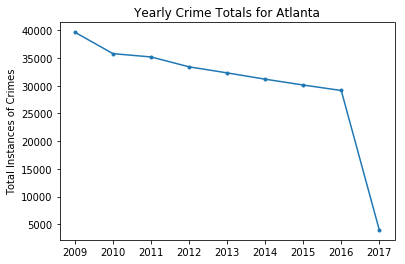

In [102]:
# Create plot of year over year change in crime totals

plt.plot(df.year.value_counts(), marker='.')
plt.title('Yearly Crime Totals for Atlanta')
plt.ylabel('Total Instances of Crimes')
plt.show()

### The level of crime for the city has a generally downward trend, with a reduction from ~40,000 crimes down to ~30,000. That's a positive sign for potential home buyers and the city as a whole, considering Atlanta's relatively high rate of population growth. 

### We also want to know just what types of crimes are occurring over this period as well...

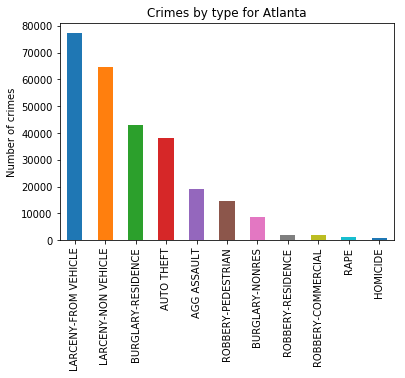

In [103]:
# Create a bar plot of the data by the type of crime and their respctive counts

crime_counts = df.crime.value_counts()
crime_counts.plot(kind='bar')
plt.ylabel('Number of crimes')
plt.title('Crimes by type for Atlanta')
plt.show()

### We can see from this graph the most prevalent crime is Larceny-From Vehicle, with  around 77,000 instances, followed by Larceny-Non Vehicle at quite near 65,000, then Burglary-Residence at ~41,000. Now you may be looking at this chart and wondering, just what is the difference between Larceny, Burglary, and Robbery? Allow me to briefly explain: 

#### * Larceny is defined as the simple act of theft, ranging from petty larceny( small or low in value) to grand larceny (large or highly valuable).
#### * Robbery is larceny, or theft, but with the added element of force or intimidation.
#### * While Burglary is the crime when the act of theft has the added attribute of breaking and entering, whether that be a home or business.

### With those definitions out of the way, I'd like to get a better sense of the data by looking at some numbers to put things in a bit more context. As someone in the market for a home, the category of Burglary-Residence will be the most likely to guide my choice on that front. Let us begin by examining what the average amount of crime is per category and what that can tell us about the dataset as a whole.

In [104]:
# Get counts for each crime, use the describe method to get some summary statistics, and use length to find how many crimes are in the dataset

crime_counts = df.crime.value_counts()
print(crime_counts.describe())
print('Total number of crimes: ',len(df.crime))


count       11.000000
mean     24608.000000
std      27318.794582
min        728.000000
25%       1867.500000
50%      14446.000000
75%      40554.500000
max      77345.000000
Name: crime, dtype: float64
Total number of crimes:  270688


### From these summary statistics we can note that there are 11 types of crime in this dataset, with an average number of crimes committed per category of 24,608. On the low end we have a category with 728 crimes, the largest category of crime having 77,345, and an overall total of 270,688 instances of crime. That gives us quite a wide range of values that would indicate a lack of uniformity as to the distribution of each category of crime.

### Now that we have a general sense of the numbers of crimes, let's take a look at which neighborhoods experience the most crime and try and narrow our search to neighborhoods with the least amount of Burglaries from residences. 


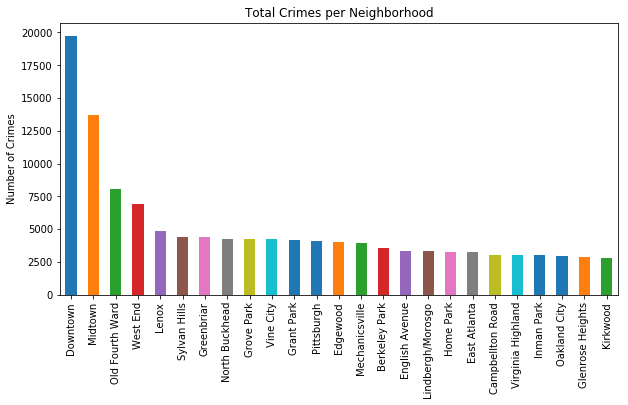

In [105]:
# Create a bar graph with the top 25 neighborhoods in terms of crime

df.neighborhood.value_counts().head(25).plot(kind='bar', figsize=(10,5))
plt.title('Total Crimes per Neighborhood')
plt.ylabel('Number of Crimes')
plt.show()

### We can see the neighborhood with the highest number of crimes is Downtown ATL with just under 20k, followed by Midtown with around 13k. This is not entirely surprising since these are the most populous neighborhoods in ATL, but it could be interesting to see what the specific crime breakdown is for Downtown, how that compares to the city at large, but as it pertains to my home buying search where do the fewest burglaries from residences occur.

### Let's take a look at just how many crimes have occured downtown.

In [106]:
# Get a count for the number of crimes that have happened just in Downtown

tot_dtwn_crime = len(df[df['neighborhood'] == 'Downtown'])
print("Total number of crimes for Downtown: ",tot_dtwn_crime)
print("Percentage of overall crime committed in Downtown: ",tot_dtwn_crime/len(df['crime'] * 100))

Total number of crimes for Downtown:  19743
Percentage of overall crime committed in Downtown:  0.0729363695472278


In [107]:
# Make a new dataframe to compare the percentage of crime by category for Downtown against those for the city as a whole

total_crimes = pd.DataFrame()
total_crimes['Downtown'] = df[df['neighborhood'] == 'Downtown']['crime'].value_counts()
total_crimes['Overall'] = df['crime'].value_counts()
total_crimes['Downtown Percent (%)'] = total_crimes['Downtown'] / total_crimes['Downtown'].sum() * 100
total_crimes['Overall Percent (%)'] = total_crimes['Overall'] / total_crimes['Overall'].sum() * 100

total_crimes.head(20)

,Downtown,Overall,Downtown Percent (%),Overall Percent (%)
LARCENY-FROM VEHICLE,8371,77345,42.399838,28.573487
LARCENY-NON VEHICLE,6284,64697,31.829003,23.900949
AUTO THEFT,1843,38168,9.334954,14.100366
ROBBERY-PEDESTRIAN,1144,14446,5.794459,5.336771
AGG ASSAULT,1081,19133,5.475358,7.068285
BURGLARY-NONRES,383,8505,1.939928,3.141994
BURGLARY-RESIDENCE,343,42941,1.737325,15.863651
ROBBERY-COMMERCIAL,115,1855,0.582485,0.685291
RAPE,98,990,0.496378,0.365735
ROBBERY-RESIDENCE,49,1880,0.248189,0.694527


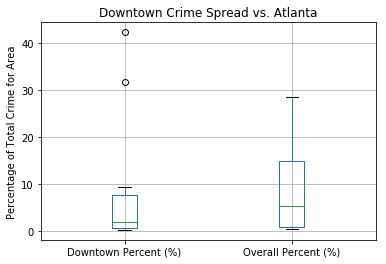

In [108]:
total_crimes[['Downtown Percent (%)', 'Overall Percent (%)']].boxplot()
plt.title('Downtown Crime Spread vs. Atlanta')
plt.ylabel('Percentage of Total Crime for Area')
plt.show()

### These numbers and plots show us that the crimes that occur Downtown have a fairly small spread percentage wise but with two crime categories, Larceny-From Vehicle and Larceny-Non Vehicle making up roughly 74% of the crimes occurring, where as for Atlanta those two crimes only account for around 52% of all crimes. What could contribute to this disparity and overrepresentation in Downtown? One factor could be the concentration of population Downtown, as well as a higher number of tourists who visit the area. But getting back to our second question, the Downtown neighborhood might not be the best candidate considering the higher levels of crime but I want to limit my parameters based on Burglaries from Residences to see how that impacts its standing. 

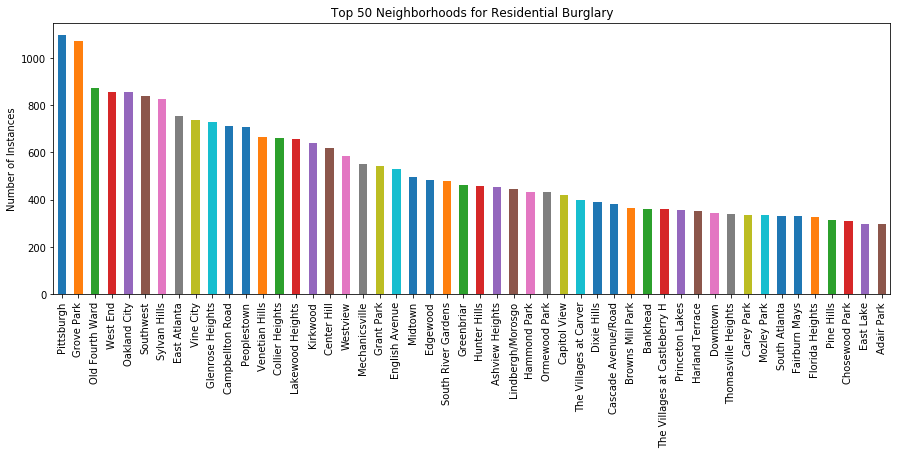

In [117]:
# Compiling dataframe for Burglary-Residence from original dataset

home_burglary = pd.DataFrame()
home_burglary['crime'] = df[df['crime'] == 'BURGLARY-RESIDENCE']['crime']
home_burglary['neighborhood'] = df[df['crime'] == 'BURGLARY-RESIDENCE']['neighborhood']
home_burglary['year'] = df[df['crime'] == 'BURGLARY-RESIDENCE']['year']
plt.figure(figsize=(15,5))
home_burglary.neighborhood.value_counts().head(50).plot(kind='bar')
plt.title('Top 50 Neighborhoods for Residential Burglary')
plt.ylabel('Number of Instances')
plt.show()


In [110]:
# Get a set of summary statistics for the 'neighborhood' column of original data set
df.neighborhood.value_counts().describe()

count      242.000000
mean      1069.950413
std       1925.724688
min          2.000000
25%        107.000000
50%        396.000000
75%       1395.750000
max      19743.000000
Name: neighborhood, dtype: float64

In [111]:
# Get descriptive analysis for home burglaries by neighborhood

home_burglary.neighborhood.describe()

count          41265
unique           238
top       Pittsburgh
freq            1095
Name: neighborhood, dtype: object

### Out of 238 neighborhoods in our dataset, we see that the Pittsburgh neighborhood has the highest rate of residential burglaries with Grove Park in a close second. Meanwhile in this context, the Downtown neighborhood falls to 40th in this ranking. This might allow Downtown to remain in the running, but let's put this into context by looking at the neighborhoods with the lowest rate of residential burglaries. 

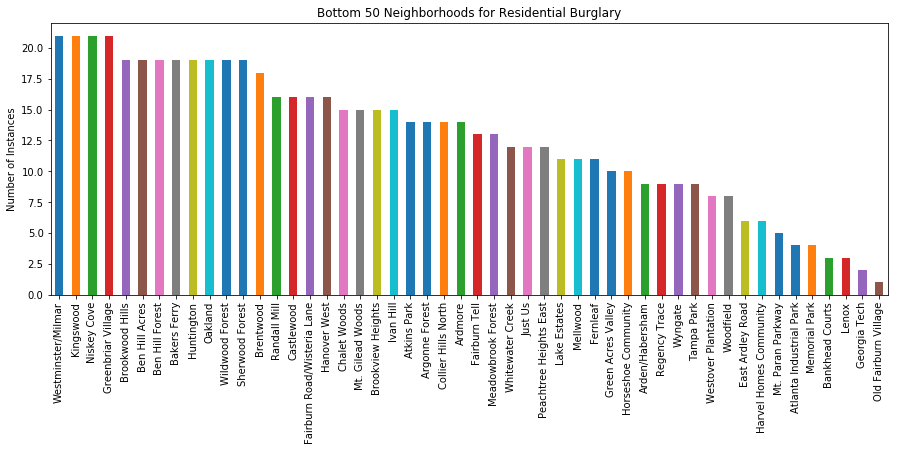

In [112]:
plt.figure(figsize=(15,5))
home_burglary.neighborhood.value_counts().tail(50).plot(kind='bar')
plt.title('Bottom 50 Neighborhoods for Residential Burglary')
plt.ylabel('Number of Instances')
plt.show()

### In terms of fewest number of residential burglaries, my best options appear to be the Lenox neighborhood, the neighborhood surrounding Georgia Tech's campus, and Old Fairburn Village, but really any of these lowest 50 neighborhoods could be suitable for my search considering the highest rate here is 20 instances over the 5 years of our dataset. This contrasts to the lowest levels of burglary for the top 50 neighborhoods ranging from 400 - 1000 instances. 

### Now that I have a better picture of what crime rates are across Atlanta, I feel much more comfortable making a decision about where I'd like to buy a home. Granted, this is a rather limited view on one spcecific factor in the home buying process, but I feel this is an important one before making such an investment. 

## Further Research

### After a brief dive into this dataset, my curiousity is piqued by another question: Does growth in population interpreted through home buying correlate to the rates of crime for that neighborhood? One way to get at this question would be to bring in home buying data to see if an increase in homes sold in a neighborhood shifts where crimes are being committed. Using mapping techniques, time series data, and regression analyses to give us a clearer picture of how the two variables interact, whether one could predict based on homebuying trends if crime in a neighborhood will rise or fall, therefore allowing anyone looking for a home to potentially make more informed decisions when choosing where to live in Atlanta. 